Vertebral Column Data Set

In [1]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.neighbors import DistanceMetric
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_table('Data/column_2C.dat', header = None, sep = ' ')
data.columns = ['inc', 'tilt', 'lumbar', 'sacral', 'pelvic', 'grade','class']
data

,inc,tilt,lumbar,sacral,pelvic,grade,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


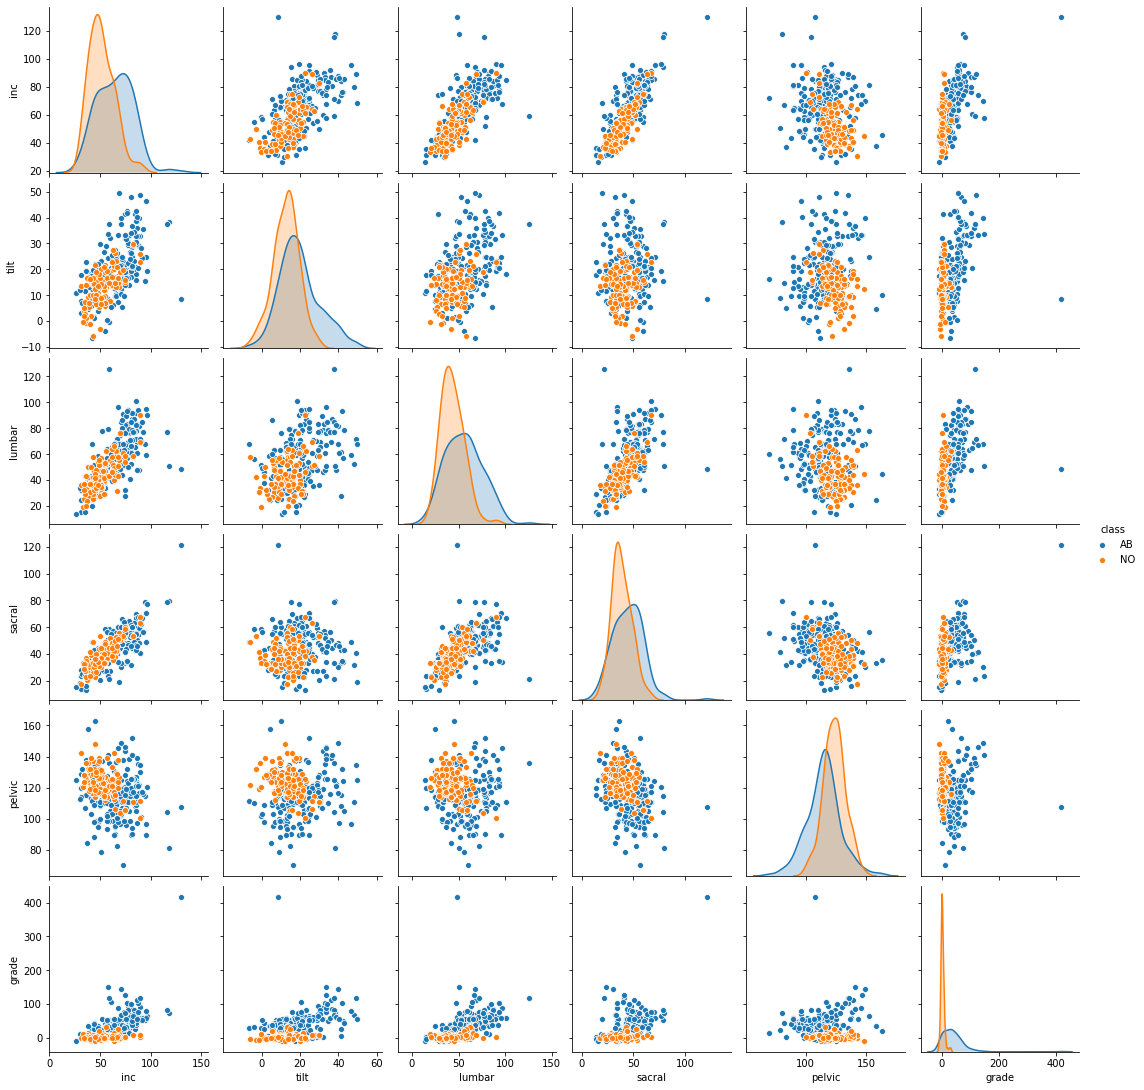

In [3]:
sns.pairplot(data = data, hue = 'class', kind = 'scatter')

Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [4]:
df_1 = data

#Setting class AB = '1' and class NO = '0'
df_1['class'].replace('AB', '1', inplace = True)
df_1['class'].replace('NO', '0', inplace = True)

#Filtering data classwise
filt_ab = (data['class'] == '1')
filt_no = (data['class'] == '0')

#Slicing data classwise
test_data_no, train_data_no = data[filt_no][70:], data[filt_no][:70]
test_data_ab, train_data_ab = data[filt_ab][140:], data[filt_ab][:140]

#Concatenating to get test data data 
f1 = [test_data_ab, test_data_no]
test = pd.concat(f1)

#Concatenating to get train data data 
f2 = [train_data_ab, train_data_no]
train = pd.concat(f2)

#Splitting train and test sets into features and label respectively
train_x = train.drop('class', axis=1)
train_y = train['class']

test_x = test.drop('class', axis=1)
test_y = test['class']

Classification using KNN on Vertebral Column Data Set<br>


In [5]:
test_error = []
train_error = []

# Calculating test error for values of k from (1,208)
for i in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_test = knn.predict(test_x)
    test_error.append(1-metrics.accuracy_score(test_y, pred_test))
    
# Calculating train error for values of k from (1,208)
for i in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_train = knn.predict(train_x)
    train_error.append(1-metrics.accuracy_score(train_y, pred_train))
    
print('Minimum test error is : ', min(test_error[1:]))
print('Minimum train error is : ', min(train_error[:-1]))

Minimum test error is :  0.06000000000000005
Minimum train error is :  0.1333333333333333


Text(0, 0.5, 'Error Rate')

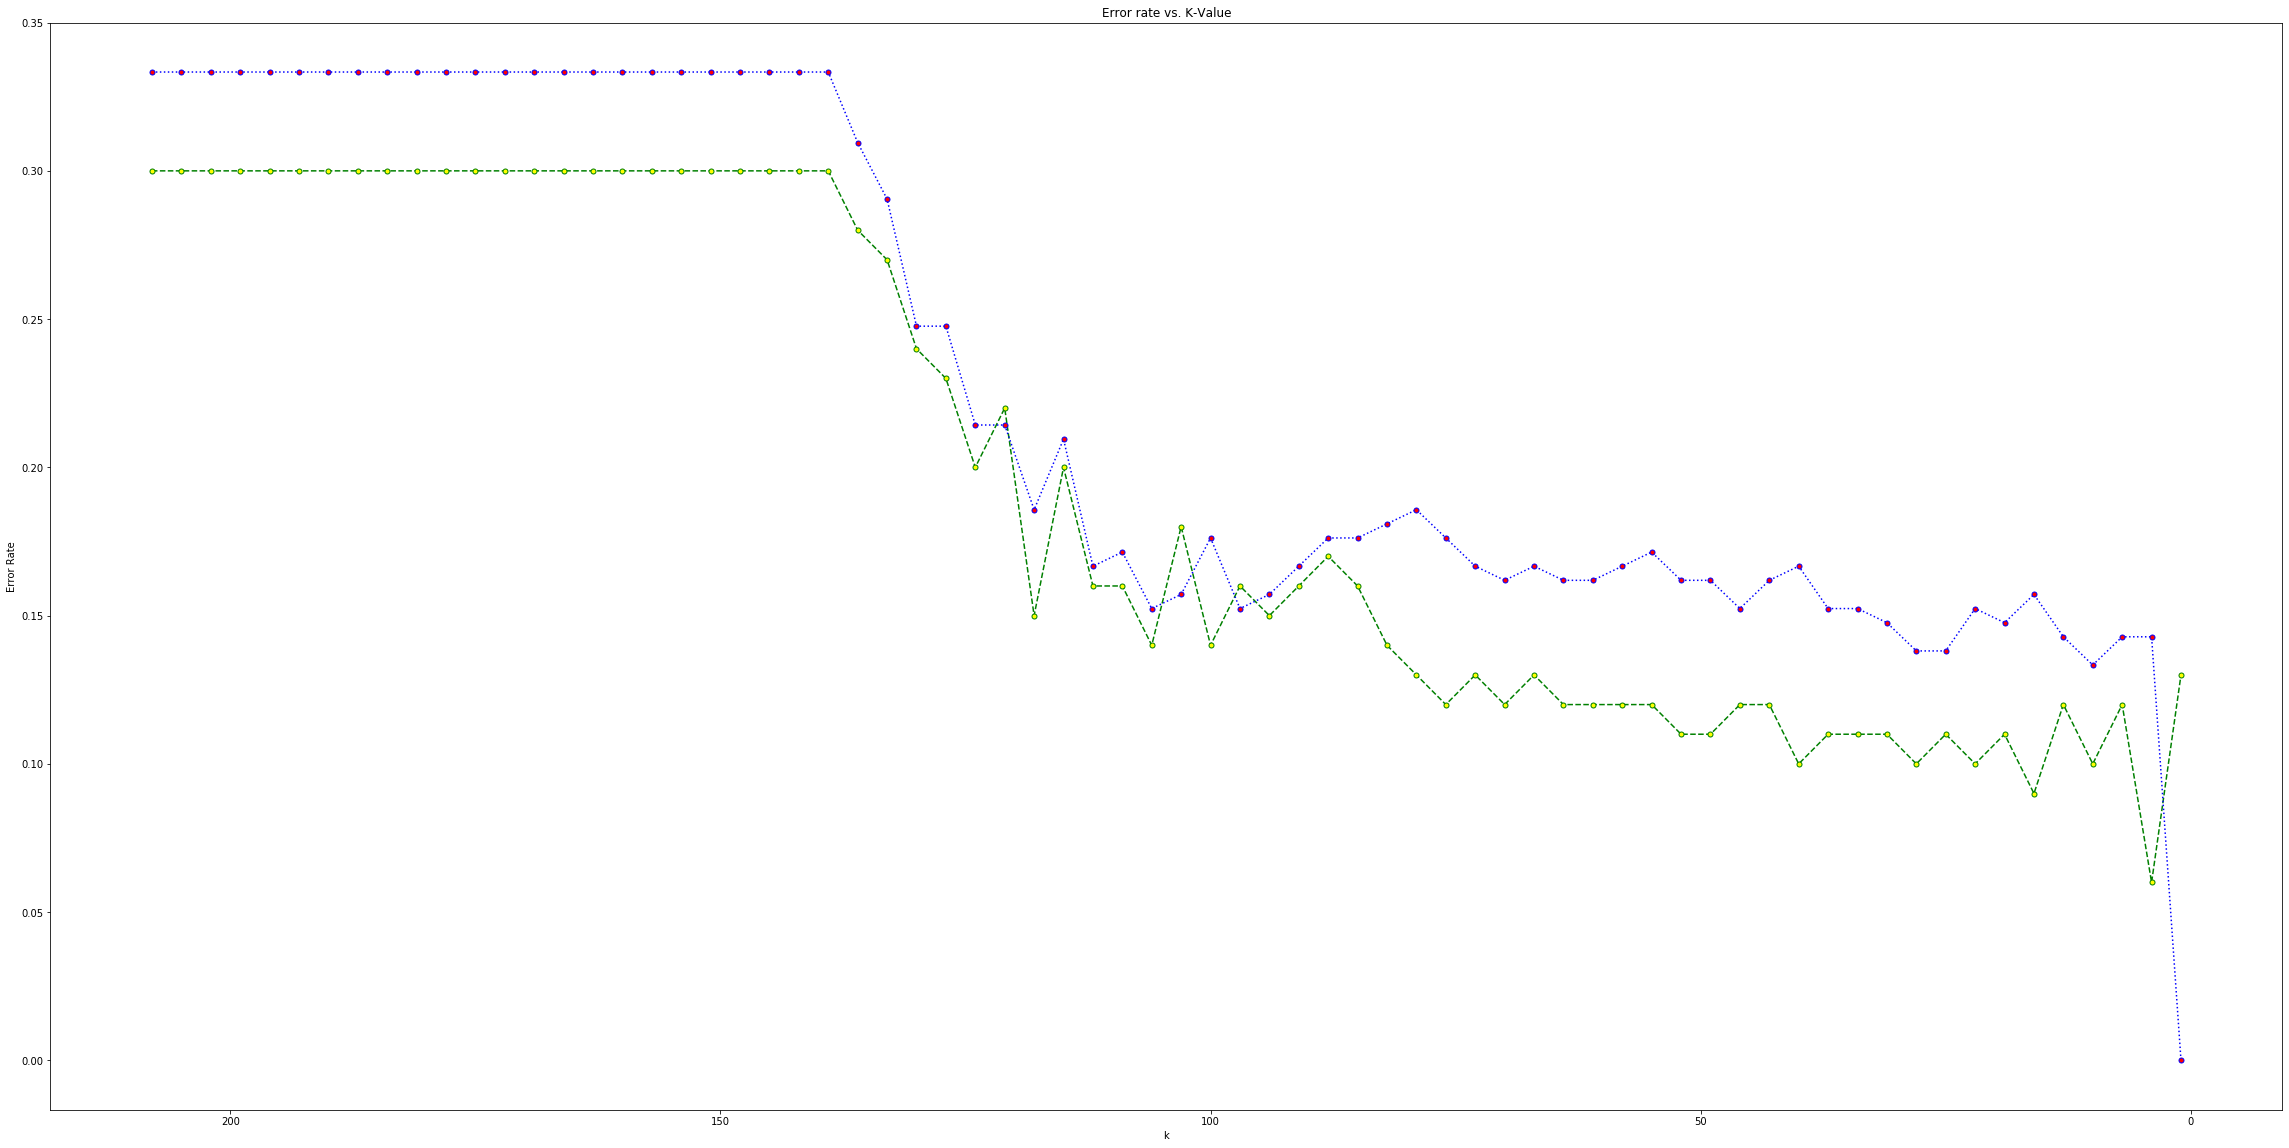

In [6]:
plt.figure(figsize=(40, 20))
plt.plot(range(208, 0, -3), test_error, color='green', linestyle='dashed', 
         marker='.', markerfacecolor='yellow', markersize=10)
plt.plot(range(208, 0, -3), train_error, color='blue', linestyle='dotted', 
         marker='.', markerfacecolor='red', markersize=10)
ax = plt.gca()
ax.invert_xaxis()
plt.title('Error rate vs. K-Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [7]:
# Calculating test error for k=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x, train_y)
pred = knn.predict(test_x)
test_error = (1-metrics.accuracy_score(test_y, pred))

metrics.accuracy_score(test_y, pred)

print(classification_report(test_y, pred))
print('Test error for k=4 is: ', test_error)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Test error for k=4 is:  0.06000000000000005


In [8]:
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, pred)
print('Confusion matrix: ', confusion_matrix)

Confusion matrix:  [[25  5]
 [ 1 69]]


In [9]:
T_N = confusion_matrix[0][0]
F_N = confusion_matrix[1][0]
T_P = confusion_matrix[1][1]
F_P = confusion_matrix[0][1]

#True Positive  Rate
T_P_R=T_P/(T_P+F_N)
print('True Positive  Rate: ', T_P_R)

#True Negative  Rate
T_N_R = T_N/(F_P+T_N)
print('True Negative  Rate: ', T_N_R)

#Precision
precision = T_P/(T_P+F_P)
print('Precision: ', precision)

#F-score
fscore = 2 * (precision * T_P_R) / (precision + T_P_R)
print('F-score: ', fscore)

True Positive  Rate:  0.9857142857142858
True Negative  Rate:  0.8333333333333334
Precision:  0.9324324324324325
F-score:  0.9583333333333333


In [10]:
train_errf = []
k_val = []
    
def cal(N):
    class0 = math.floor(N/3)
    class1 = N - class0 

    train_data_1, train_data_2 = data[filt_no][:class0], data[filt_ab][:class1]

    x = [train_data_2, train_data_1]
    train = pd.concat(x)

    mink = -1
    min_error = 1
    
    train_xf = train.drop('class', axis=1)
    train_yf = train['class']

    k=1
    while(k <= N):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_xf, train_yf)
        pred_if = knn.predict(test_x)
        error_loop =1-metrics.accuracy_score(test_y, pred_if)
        if(error_loop < min_error):
            min_error = error_loop
            mink = k
        k = k+5
            
    train_errf.append(min_error)
    k_val.append(mink)      
      
best_err_rates = [(n,cal(n)) for n in range(10, 220, 10)]

count = 0
print('N\tk\terror')
for i in range(10,220,10):
    print('{}\t{}\t{}'.format(i,k_val[count],train_errf[count]))
    count = count +1

N	k	error
10	1	0.25
20	6	0.19999999999999996
30	1	0.21999999999999997
40	11	0.25
50	26	0.30000000000000004
60	21	0.29000000000000004
70	26	0.29000000000000004
80	31	0.29000000000000004
90	41	0.29000000000000004
100	6	0.25
110	6	0.21999999999999997
120	16	0.17000000000000004
130	16	0.16000000000000003
140	16	0.15000000000000002
150	16	0.13
160	6	0.13
170	6	0.13
180	6	0.09999999999999998
190	6	0.08999999999999997
200	6	0.08999999999999997
210	6	0.07999999999999996


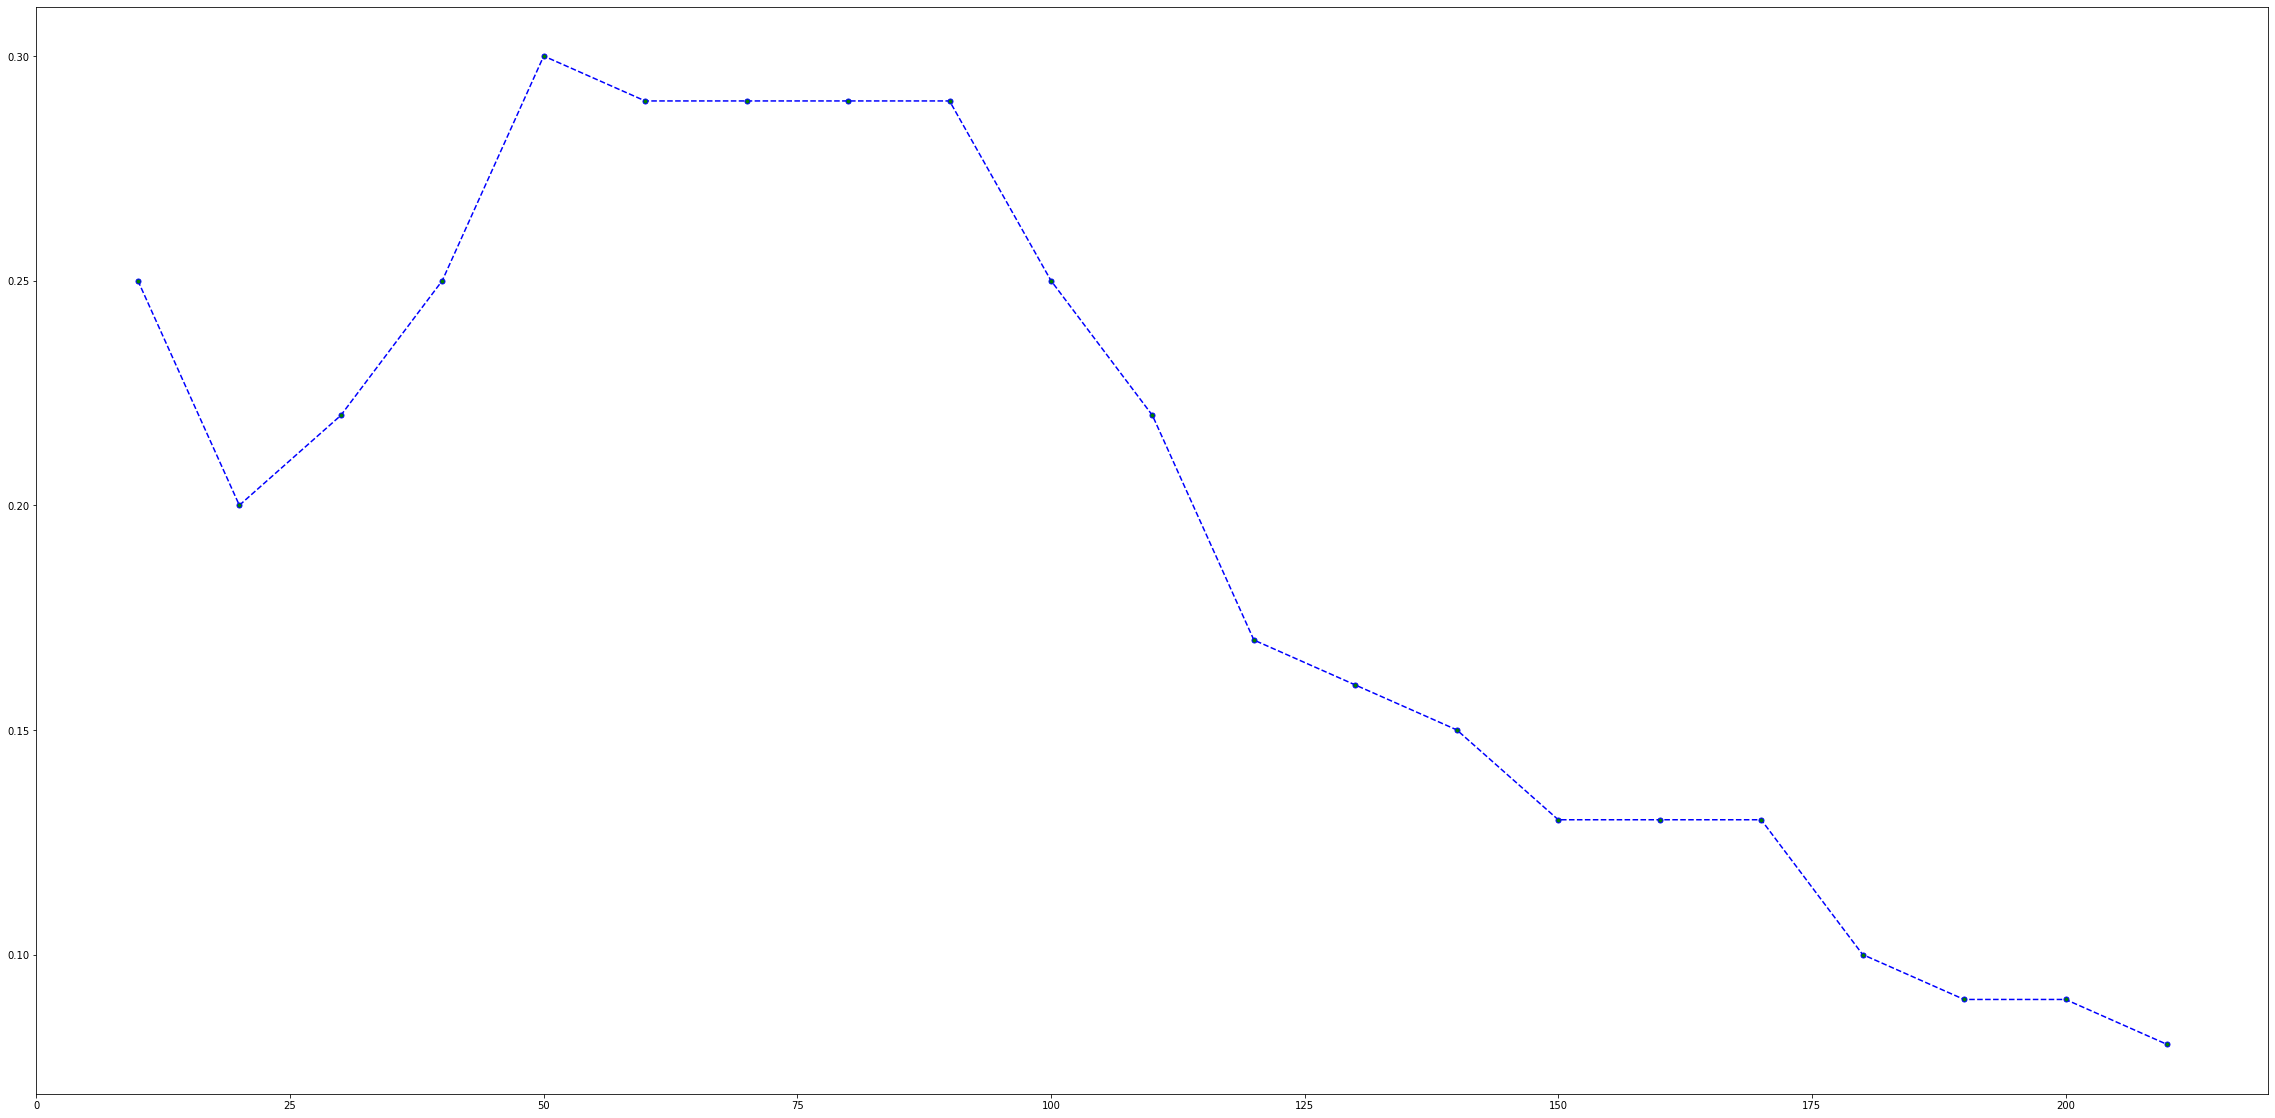

In [11]:
#Learning curver for N v/s best test error rate
plt.figure(figsize=(40, 20))
plt.plot(range(10, 220, 10), train_errf, color='blue', linestyle='dashed', 
         marker='.', markerfacecolor='green', markersize=10)

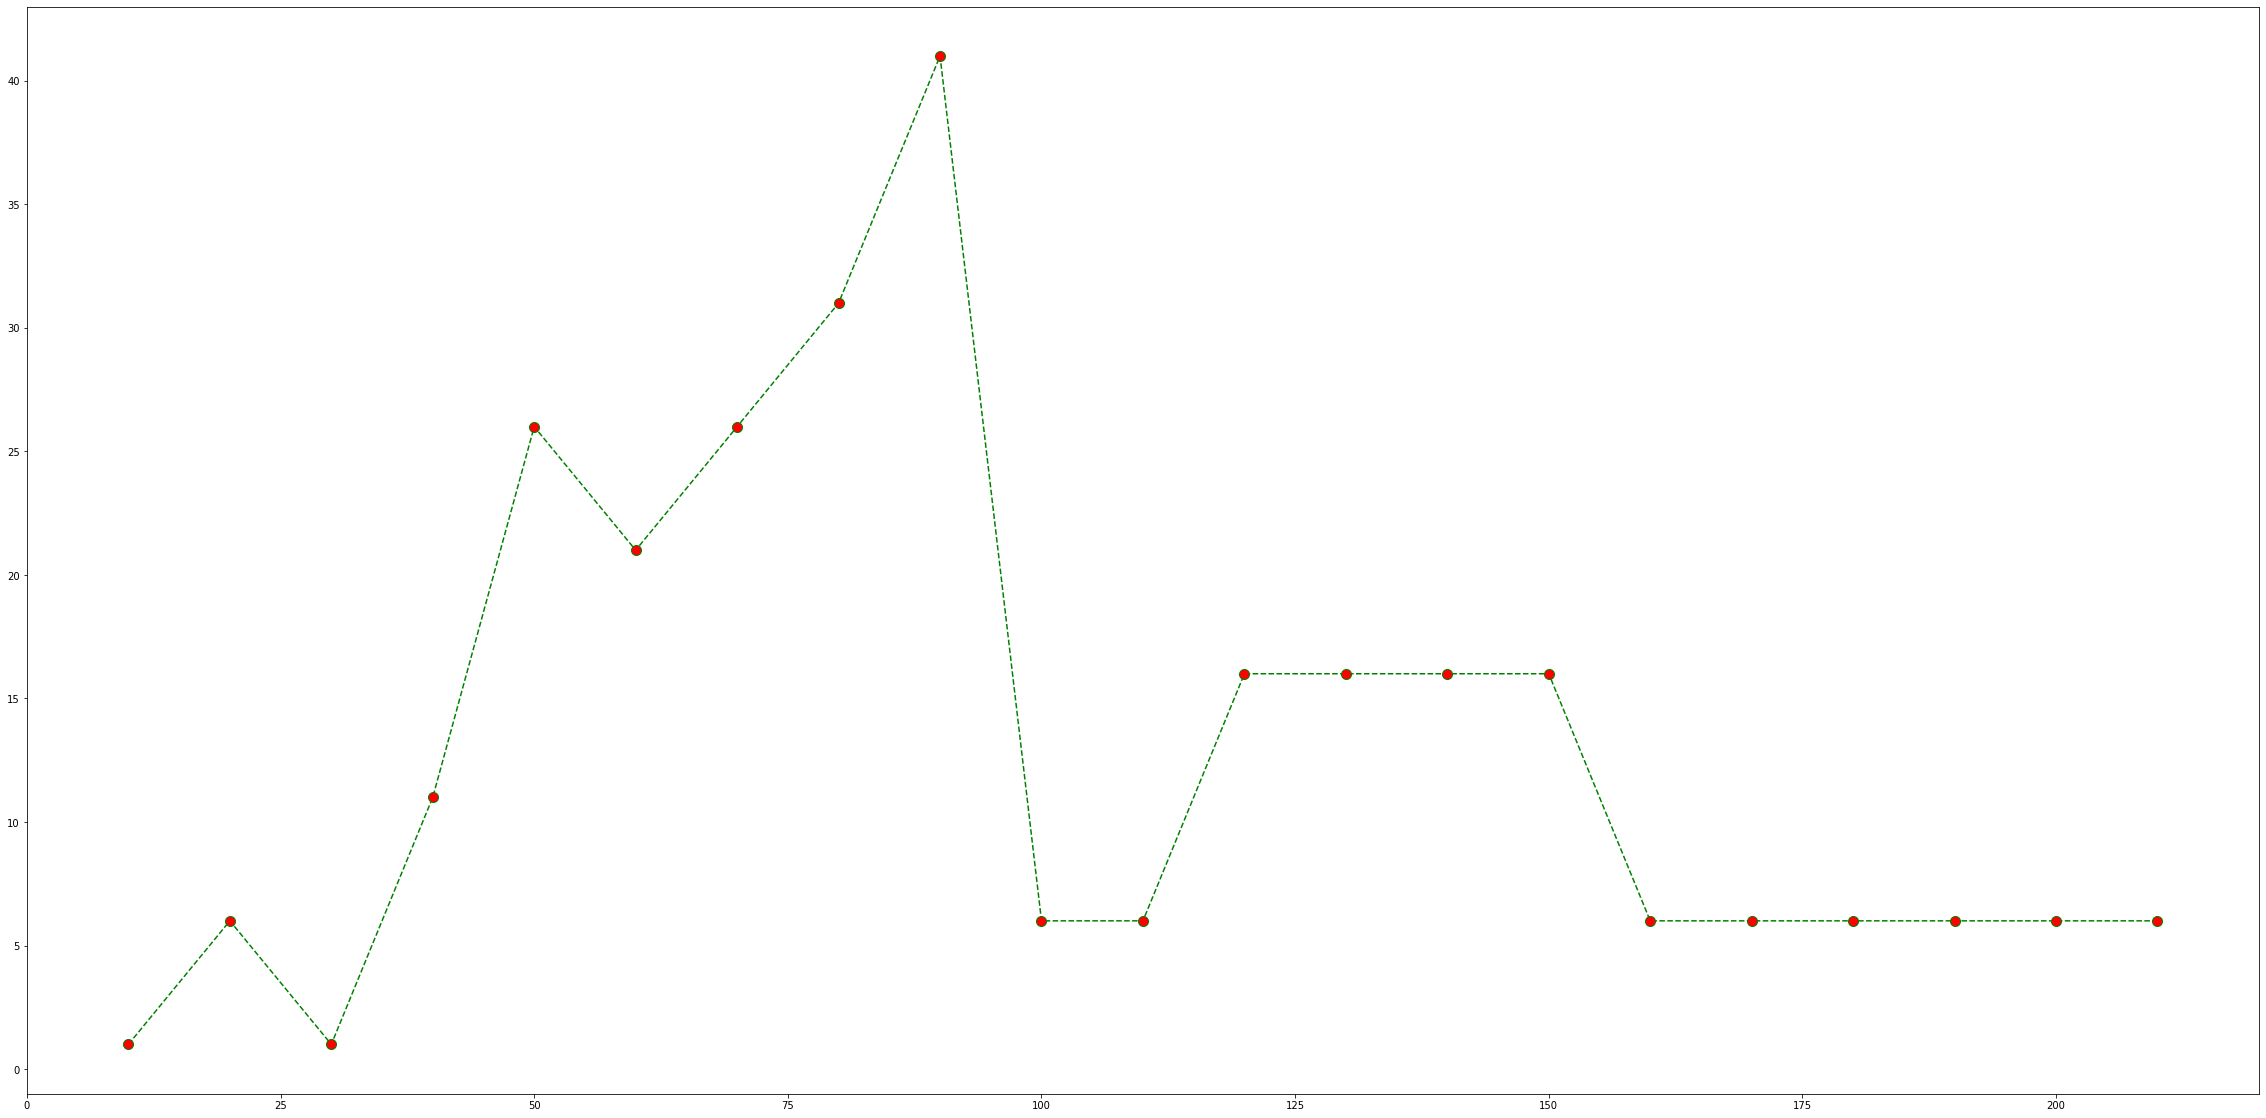

In [12]:
#Learning curver for N v/s value of k
plt.figure(figsize=(40, 20))
plt.plot(range(10, 220, 10), k_val, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)

In [13]:

def distance(p):
    
    test = []
    train = []

    # Calculating test error for values of k from (1,196)
    for i in range(1, 201, 5):
        knn = KNeighborsClassifier(n_neighbors=i , p=p)
        knn.fit(train_x, train_y)
        pred = knn.predict(test_x)
        test.append(1-metrics.accuracy_score(test_y, pred))
        

    print('The minimum test error is: ',min(test[1:]))  
    
    # Calculating test error for values of k from (1,196)
    for i in range(1, 201, 5):
        knn = KNeighborsClassifier(n_neighbors=i , p=p)
        knn.fit(train_x, train_y)
        pred = knn.predict(train_x)
        train.append(1-metrics.accuracy_score(train_y, pred))
        

    print('The minimum train error is: ',min(train[1:]))  
    
distance(1)

The minimum test error is:  0.10999999999999999
The minimum train error is:  0.1333333333333333


In [14]:
test = []
train = []

for value in np.arange(0.1, 1.1, 0.1):
    
    p = 10**value    #Calculating value of p from log10(p)

    # Calculating test error for values of k=6
    knn = KNeighborsClassifier(n_neighbors=6 , p=p)
    knn.fit(train_x, train_y)
    pred = knn.predict(test_x)
    test.append(1-metrics.accuracy_score(test_y, pred))
   
    
print('Minimum test error is: ', min(test))  

for value in np.arange(0.1, 1.1, 0.1):
    
    p = 10**value
    
    # Calculating train error for values of k=6
    knn = KNeighborsClassifier(n_neighbors=6 , p=p)
    knn.fit(train_x, train_y)
    pred = knn.predict(train_x)
    train.append(1-metrics.accuracy_score(train_y, pred))
 
    
print('Minimum train error is: ', min(train))  

Minimum test error is:  0.06000000000000005
Minimum train error is:  0.1333333333333333


In [15]:
# calculating Chebyshev Distance
test = []
train = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred = knn.predict(test_x)
    test.append(1-metrics.accuracy_score(test_y, pred))
    

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred = knn.predict(train_x)
    train.append(1-metrics.accuracy_score(train_y, pred))
    
print('Minimum test error is: ', min(test[1:]))      
print('Minimum train error is: ', min(train[1:])) 

Minimum test error is:  0.07999999999999996
Minimum train error is:  0.1333333333333333


In [16]:
#calculating the Mahalanobis Distance
test = []
train = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': train_x.cov()})
    knn.fit(train_x, train_y)
    pred = knn.predict(test_x)
    test.append(1-metrics.accuracy_score(test_y, pred))
    

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': train_x.cov()})
    knn.fit(train_x, train_y)
    pred = knn.predict(train_x)
    train.append(1-metrics.accuracy_score(train_y, pred))  

print('Minimum test error is: ', min(test[1:]))
print('Minimum train error is: ',min(train[1:]))

C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\U

C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\U

Minimum test error is:  0.16000000000000003
Minimum train error is:  0.11904761904761907


C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\Users\Mishi\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1458: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)
C:\U

In [17]:
#For Euclidean Distance
test = []


# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(train_x, train_y)
    pred = knn.predict(test_x)
    test.append(1-metrics.accuracy_score(test_y, pred))

print('Minimum test error is: ', min(test[1:]))



Minimum test error is:  0.09999999999999998


In [18]:
#For Manhatton Distance
test = []


# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', p=1)
    knn.fit(train_x, train_y)
    pred_manw = knn.predict(test_x)
    test.append(1-metrics.accuracy_score(test_y, pred_manw))

print('Minimum test error is: ', min(test[1:]))



Minimum test error is:  0.09999999999999998


In [19]:
#For Chebyshev Distance
test_error = []


# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred_chebyw = knn.predict(test_x)
    test_error.append(1-metrics.accuracy_score(test_y, pred_chebyw))

print('Minimum test error is: ', min(test_error[1:]))



Minimum test error is:  0.10999999999999999
